In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ffn
import bt

import pyfolio as pf
%matplotlib inline

### Create Fake Index Data

,foo,bar,rf
2017-01-02,102.053214,100.048323,100.0
2017-01-03,101.318095,99.590393,100.0
2017-01-04,100.693312,99.851232,100.0
2017-01-05,99.391960,99.750658,100.0
2017-01-06,100.497067,99.807467,100.0


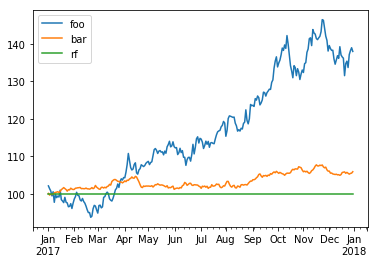

In [18]:
names = ['foo','bar','rf']
dates = pd.date_range(start='2017-01-01',end='2017-12-31', freq=pd.tseries.offsets.BDay())
n = len(dates)
rdf = pd.DataFrame(
    np.zeros((n, len(names))),
    index = dates,
    columns = names
)

np.random.seed(1)
rdf['foo'] = np.random.normal(loc = 0.1/n,scale=0.2/np.sqrt(n),size=n)
rdf['bar'] = np.random.normal(loc = 0.04/n,scale=0.05/np.sqrt(n),size=n)
rdf['rf'] = 0.

pdf = 100*np.cumprod(1+rdf)
pdf.plot()
pdf.head()

### Build Strategy

In [20]:
# algo to fire on the beginning of every month and to run on the first date
runMonthlyAlgo = bt.algos.RunMonthly(
    run_on_first_date=True
)

# algo to set the weights
#  it will only run when runMonthlyAlgo returns true
#  which only happens on the first of every month
weights = pd.Series([0.6,0.4,0.],index = rdf.columns)
weighSpecifiedAlgo = bt.algos.WeighSpecified(**weights)

# algo to rebalance the current weights to weights set by weighSpecified
#  will only run when weighSpecifiedAlgo returns true
#  which happens every time it runs
rebalAlgo = bt.algos.Rebalance()

# a strategy that rebalances monthly to specified weights
strat = bt.Strategy('static',
                [
                    runMonthlyAlgo,
                    weighSpecifiedAlgo,
                    rebalAlgo
                ]
)

### Run Backtest

Note: The logic of the strategy is seperate from the data used in the backtest.

In [21]:
# set integer_positions=False when positions are not required to be integers(round numbers)
backtest = bt.Backtest(
    strat,
    pdf,
    integer_positions=False
)

res = bt.run(backtest)

static
0% [############################# ] 100% | ETA: 00:00:00

In [22]:
res['static'].returns.index[0]
res['static'].rf

0.0